In [1]:
import numpy as np
import pandas as pd

### Loading in the data

In [72]:
data = pd.read_csv('summary.csv')

In [73]:
data.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

### Preprocessing / data-cleaning

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [79]:
def preprocess_inputs(df):
    df = df.copy()
    
    #Dropping certain columns
    df = df.drop('Name', axis = 1)
    
    #Filling total_bedrooms columns that has missing values w/ mean values of the column
    df['3PointPercent'] = df['3PointPercent'].fillna(df['3PointPercent'].mean())
    
    #Splitting
    y = df['Target']
    X = df.drop('Target', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True, random_state = 42)
    
    #StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train) 
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    return X_train, X_test, y_train, y_test


In [80]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
1080,-0.763941,-1.018629,-0.953922,-1.011703,-0.791071,-2.021116,0.137569,0.113641,0.631901,-0.907732,-0.915260,0.003447,-0.649421,-0.460538,-0.550673,-0.721337,-0.775409,-0.399275,-0.956547
332,-1.513966,-0.064319,0.045044,0.043090,0.114177,-0.226405,0.926766,1.260662,0.725924,-0.304865,-0.095519,-1.016617,0.120354,0.128775,0.129912,-0.721337,-0.296938,0.314242,-0.000437
355,1.255358,1.324867,1.634308,1.508080,0.991993,1.647719,-0.651628,-0.651040,-0.170431,2.307559,2.289185,0.277354,2.814569,2.412360,2.706414,0.210195,1.377711,1.503437,1.775196
138,0.851498,0.032320,0.113155,0.101689,0.031882,0.456539,-0.651628,-0.651040,-1.217223,0.398480,0.277091,0.551260,0.120354,-0.018554,0.032686,-0.588261,-0.536174,-0.161436,-0.410199
381,1.024581,-0.402555,-0.431735,-0.425707,-0.544185,0.805951,-0.651628,-0.651040,-1.217223,-0.204387,-0.170041,-0.327129,-0.007941,0.276103,0.129912,-0.189033,-0.536174,-0.399275,0.136150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.648552,1.457746,0.703453,0.511887,0.662812,-0.258170,2.242095,2.120928,1.026799,0.498958,0.277091,1.080182,-0.777717,-0.165882,-0.356220,0.609423,0.660004,0.314242,0.545911
1130,0.966887,1.421506,0.158563,0.160289,0.553085,-1.115819,0.663701,0.878322,0.838752,-0.304865,-0.319085,0.220683,-0.392829,-0.313210,-0.404834,1.807106,0.420769,-0.637114,0.545911
1294,0.563027,-0.595833,-0.454439,-0.542906,-0.407026,-0.655230,-0.651628,-0.364284,-0.715766,-0.003431,-0.170041,1.250193,-0.906013,-0.828858,-0.890966,-0.455185,0.660004,-0.637114,-0.410199
860,1.024581,0.600075,0.158563,0.101689,0.059313,0.329479,0.400635,0.400396,0.807411,0.197524,0.053525,0.692935,0.890130,0.865415,0.907724,-0.255571,0.181533,1.027759,-0.273612


In [81]:
X.isna().sum().sum()

0

In [82]:
X_train.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
count,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02,9.370000e+02
mean,9.478959e-17,-5.782165e-17,-3.602004e-17,9.289379e-17,-2.132766e-16,6.668447e-16,-5.308217e-17,-1.895792e-17,6.066533e-17,1.308096e-16,3.791583e-18,-7.583167e-16,-3.412425e-17,-3.033267e-17,1.308096e-16,5.687375e-18,1.639860e-16,-6.256113e-17,1.744128e-16
std,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00,1.000534e+00
min,-2.840934e+00,-1.755501e+00,-1.317182e+00,-1.304701e+00,-1.394569e+00,-3.228179e+00,-6.516283e-01,-7.466247e-01,-1.217223e+00,-1.309643e+00,-1.362392e+00,-6.645861e+00,-1.290901e+00,-1.344507e+00,-1.328485e+00,-1.054027e+00,-1.493116e+00,-8.749532e-01,-1.502896e+00
25%,-7.639408e-01,-8.011911e-01,-7.041801e-01,-7.187053e-01,-7.087755e-01,-6.711121e-01,-6.516283e-01,-7.466247e-01,-1.217223e+00,-7.067763e-01,-6.916945e-01,-5.443650e-01,-7.777171e-01,-7.551941e-01,-7.451263e-01,-7.213370e-01,-7.754091e-01,-6.371142e-01,-6.833731e-01
50%,1.014729e-01,-1.851174e-01,-2.955124e-01,-3.085079e-01,-3.247310e-01,-4.051115e-03,-3.885625e-01,-4.598694e-01,1.743211e-01,-3.048650e-01,-2.445626e-01,7.900771e-02,-2.645333e-01,-2.395458e-01,-2.589939e-01,-3.221091e-01,-2.969380e-01,-3.992752e-01,-2.736116e-01
75%,9.668867e-01,6.483942e-01,4.537118e-01,4.532871e-01,4.433580e-01,5.835978e-01,4.006349e-01,4.003965e-01,8.011428e-01,3.984799e-01,3.516133e-01,6.551552e-01,5.052423e-01,4.234307e-01,4.702047e-01,2.767326e-01,4.207686e-01,3.142420e-01,4.093242e-01
max,1.255358e+00,2.714053e+00,3.972795e+00,4.203663e+00,3.817463e+00,4.697140e+00,4.872753e+00,4.988481e+00,5.050994e+00,6.226195e+00,6.238850e+00,2.799179e+00,4.225824e+00,5.579915e+00,5.282915e+00,5.998998e+00,4.487773e+00,8.400770e+00,4.370352e+00


### Model training

### Clustering with the K-Means algorthim

In [83]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [117]:
kmeans = KMeans (n_clusters = 4)
kmeans.fit(X_train)
Cluster = pd.Series(kmeans.labels_, name = 'Cluster', index = X_train.index)
centroids = pca.transform(kmeans.cluster_centers_) #Getting the centroids
X_reduced = pd.concat([X_reduced, y_train, clusters], axis=1)
X_reduced

,PC1,PC2,Target,Cluster
1080,-3.072998,-0.922273,1,1
332,-0.314407,-0.593814,0,1
355,6.411717,2.873012,1,2
138,0.048547,1.250325,1,0
381,-0.623954,1.505371,1,0
...,...,...,...,...
1095,1.734498,-3.264763,1,3
1130,0.973793,-2.551465,1,3
1294,-1.439610,-0.493811,1,1
860,1.475674,0.291239,1,0


In [104]:
pca = PCA(n_components = 2)
X_reduced = pd.DataFrame(pca.fit_transform(X_train), index = X_train.index, columns = ['PC1', 'PC2'])

In [105]:
X_reduced

,PC1,PC2
1080,-3.072998,-0.922273
332,-0.314407,-0.593814
355,6.411717,2.873012
138,0.048547,1.250325
381,-0.623954,1.505371
...,...,...
1095,1.734498,-3.264763
1130,0.973793,-2.551465
1294,-1.439610,-0.493811
860,1.475674,0.291239


In [106]:
import matplotlib.pyplot as plt

In [107]:
centroids

array([[ 0.21124985,  2.04204433],
       [-2.4377803 , -0.38199784],
       [ 6.91475049,  1.06324955],
       [ 1.97596498, -1.87108283]])

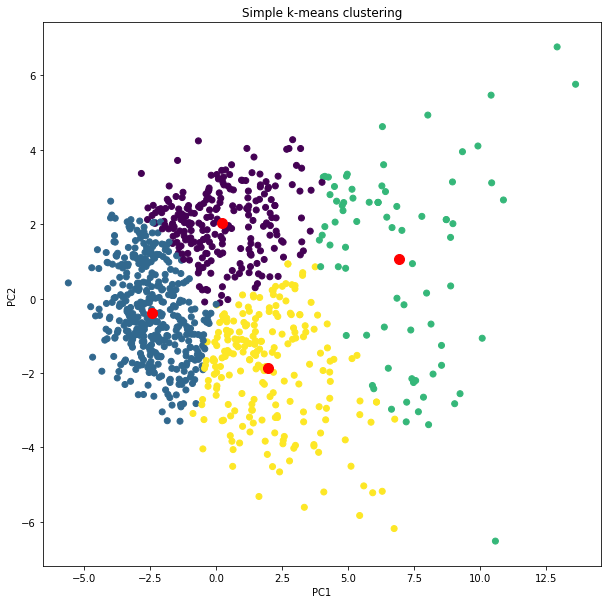

In [120]:
plt.figure(figsize = (10,10))
plt.scatter(X_reduced['PC1'], X_reduced['PC2'], c = X_reduced['Cluster'])
plt.scatter(centroids[:,0], centroids[:, 1], color = 'red', s = 100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Simple k-means clustering')
plt.show()